In [21]:
from data import load_data
import sklearn
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 

# Parameters

In [22]:
#TODO Test and show results on Forest Cover Dataset 
dataset='ElectricDevices'

# Load Data

In [23]:

train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='feat',cwd='/media/jacqueline/Data/UCRArchive_2018/')

In [24]:
print(test_y.shape)

(7711,)


In [25]:
enc1=pickle.load(open(f'./ClassificationModels/models/{dataset}/OneHotEncoder.pkl','rb'))
train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))

# Model Training

In [26]:
n_pred_classes =train_y.shape[1]
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)
model = ResNetBaseline(in_channels=1, num_pred_classes=n_pred_classes)
model.load_state_dict(torch.load(f'./ClassificationModels/models/{dataset}/ResNet'))
model.eval()

ResNetBaseline(
  (layers): Sequential(
    (0): ResNetBlock(
      (layers): Sequential(
        (0): ConvBlock(
          (layers): Sequential(
            (0): Conv1dSamePadding(1, 64, kernel_size=(8,), stride=(1,))
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
        )
        (1): ConvBlock(
          (layers): Sequential(
            (0): Conv1dSamePadding(64, 64, kernel_size=(5,), stride=(1,))
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
        )
        (2): ConvBlock(
          (layers): Sequential(
            (0): Conv1dSamePadding(64, 64, kernel_size=(3,), stride=(1,))
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
        )
      )
      (residual): Sequential(
        (0): Conv1dSamePadding(1, 64, kernel_size=(1,)

# Explanation Algo

In [27]:
item=test_x[10].reshape(1,1,-1)
shape=item.shape
_item=  torch.from_numpy(item).float()
model.eval()
#y_target= model(_item).detach().numpy()
y_target = torch.nn.functional.softmax(model(_item)).detach().numpy()

/home/jacqueline/.local/share/virtualenvs/InterpretabiltyTimeSeries-y2AnfPaS/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [28]:
print(y_target)

[[4.1477983e-20 1.0035221e-24 2.7577461e-18 6.8558425e-01 9.2766830e-04
  3.1348085e-01 7.2163630e-06]]


In [29]:
from InterpretabilityModels.TSInsight.TSInsightPYT import TSInsightPYT
exp_model=TSInsightPYT(model,(shape[-2],shape[-1]),train_loader, test_loader)

/home/jacqueline/.local/share/virtualenvs/InterpretabiltyTimeSeries-y2AnfPaS/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([16, 1, 96])) that is different to the input size (torch.Size([16, 96])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/jacqueline/.local/share/virtualenvs/InterpretabiltyTimeSeries-y2AnfPaS/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([14, 1, 96])) that is different to the input size (torch.Size([14, 96])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/jacqueline/.local/share/virtualenvs/InterpretabiltyTimeSeries-y2AnfPaS/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target s

Epoch: 0, Train loss: 3.767, Validation loss: 0.99
Epoch: 1, Train loss: 1.866, Validation loss: 0.99
Epoch: 2, Train loss: 1.518, Validation loss: 0.99
Epoch: 3, Train loss: 1.215, Validation loss: 0.99
Epoch: 4, Train loss: 0.991, Validation loss: 0.99
Epoch: 5, Train loss: 0.99, Validation loss: 0.99
Epoch: 6, Train loss: 0.99, Validation loss: 0.99
Epoch: 7, Train loss: 0.99, Validation loss: 0.99
Epoch: 8, Train loss: 0.99, Validation loss: 0.99
Epoch: 9, Train loss: 0.99, Validation loss: 0.99
Epoch: 10, Train loss: 0.99, Validation loss: 0.99
Epoch: 11, Train loss: 0.99, Validation loss: 0.99
Epoch: 12, Train loss: 0.99, Validation loss: 0.99
Epoch: 13, Train loss: 0.99, Validation loss: 0.99
Epoch: 14, Train loss: 0.99, Validation loss: 0.99
Epoch: 15, Train loss: 0.99, Validation loss: 0.99
Epoch: 16, Train loss: 0.99, Validation loss: 0.99
Epoch: 17, Train loss: 0.99, Validation loss: 0.99
Epoch: 18, Train loss: 0.99, Validation loss: 0.99
Epoch: 19, Train loss: 0.991, Valida

In [30]:
exp=exp_model.explain(item)

In [31]:
np.count_nonzero(item.flatten()-exp.flatten())

96

In [32]:
exp.shape

(1, 1, 96)

In [33]:
item.shape

(1, 1, 96)

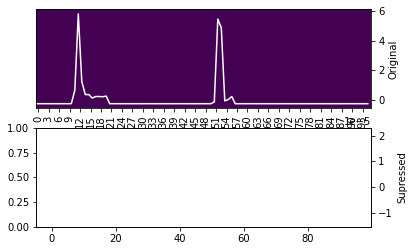

In [34]:
#TODO scale og plot
exp_model.plot(item, exp,all_in_one=False)

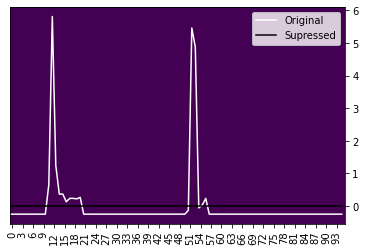

In [35]:
exp_model.plot(item, exp)

<AxesSubplot:>

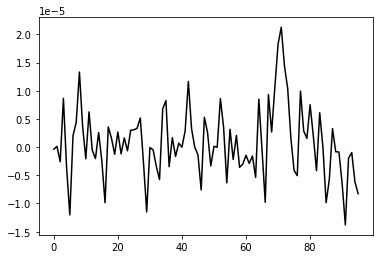

In [36]:
sns.lineplot(x=range(0,len(exp.reshape(-1))), y=exp.flatten(), color='black')

In [37]:
#print(exp)

In [38]:
#print(exp.shape)

# Plot Item 

In [39]:

#exp_model.plot(item,np.argmax(y_target,axis=1)[0],exp,label)

In [40]:
e#xp_model.plot_in_one(item,np.argmax(y_target,axis=1)[0],exp,label)

NameError: name 'e' is not defined